In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = r'D:\Work\Data Analytics\Project\Uber Data Analysis\2020_Yellow_Taxi_Trip_Data.csv'

In [4]:
df = pd.read_csv(file_path)

In [5]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.20,1.0,N,238,239,1.0,6.00,3.0,0.5,1.47,0.00,0.3,11.27,2.5
1,1.0,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.20,1.0,N,239,238,1.0,7.00,3.0,0.5,1.50,0.00,0.3,12.30,2.5
2,1.0,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.60,1.0,N,238,238,1.0,6.00,3.0,0.5,1.00,0.00,0.3,10.80,2.5
3,1.0,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.80,1.0,N,238,151,1.0,5.50,0.5,0.5,1.36,0.00,0.3,8.16,0.0
4,2.0,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.00,1.0,N,193,193,2.0,3.50,0.5,0.5,0.00,0.00,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24648494,NaN,12/31/2020 11:44:35 PM,01/01/2021 12:01:22 AM,NaN,9.22,NaN,NaN,143,20,NaN,32.49,0.0,0.5,8.16,0.00,0.3,43.95,2.5
24648495,NaN,12/31/2020 11:41:36 PM,12/31/2020 11:50:32 PM,NaN,4.79,NaN,NaN,4,262,NaN,13.22,0.0,0.5,3.65,0.00,0.3,20.17,2.5
24648496,NaN,12/31/2020 11:01:17 PM,12/31/2020 11:40:37 PM,NaN,28.00,NaN,NaN,210,78,NaN,69.31,0.0,0.5,2.75,6.12,0.3,78.98,0.0
24648497,NaN,12/31/2020 11:31:29 PM,12/31/2020 11:44:22 PM,NaN,7.08,NaN,NaN,148,129,NaN,35.95,0.0,0.5,2.75,0.00,0.3,39.50,0.0


In [6]:
df.shape

(24648499, 18)

In [7]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [8]:
df.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [9]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

In [10]:
df['duration'] = df['duration'].dt.total_seconds()/60

In [11]:
df_a = df[['passenger_count', 'payment_type', 'fare_amount', 'trip_distance', 'duration']]

In [12]:
df_a

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.00,1.20,4.800000
1,1.0,1.0,7.00,1.20,7.416667
2,1.0,1.0,6.00,0.60,6.183333
3,1.0,1.0,5.50,0.80,4.850000
4,1.0,2.0,3.50,0.00,2.300000
...,...,...,...,...,...
24648494,NaN,NaN,32.49,9.22,16.783333
24648495,NaN,NaN,13.22,4.79,8.933333
24648496,NaN,NaN,69.31,28.00,39.333333
24648497,NaN,NaN,35.95,7.08,12.883333


In [13]:
df_a.isnull().sum()

passenger_count    809568
payment_type       809568
fare_amount             0
trip_distance           0
duration                0
dtype: int64

In [14]:
809568/len(df_a) * 100

3.2844515197456854

In [15]:
df_a.dropna(inplace = True)

In [16]:
df_a['passenger_count'] = df_a['passenger_count'].astype('int64')
df_a['payment_type'] = df_a['payment_type'].astype('int64')

In [17]:
df_a

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,1,6.0,1.20,4.800000
1,1,1,7.0,1.20,7.416667
2,1,1,6.0,0.60,6.183333
3,1,1,5.5,0.80,4.850000
4,1,2,3.5,0.00,2.300000
...,...,...,...,...,...
24549234,1,2,33.0,11.30,26.050000
24549235,1,1,9.0,2.18,8.216667
24549236,1,1,9.5,2.52,8.133333
24549237,1,1,4.5,0.59,2.700000


In [18]:
df_a[df_a.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
2064,1,2,7.0,0.00,0.000000
2451,1,1,52.0,0.00,0.200000
2456,2,1,9.5,1.70,13.066667
2476,1,1,4.0,0.40,3.083333
3358,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
24549232,3,2,6.0,0.82,6.433333
24549233,1,1,7.0,1.83,6.183333
24549235,1,1,9.0,2.18,8.216667
24549236,1,1,9.5,2.52,8.133333


In [19]:
df_a.drop_duplicates(inplace = True)

In [20]:
df_a['passenger_count'].value_counts(normalize = True)

passenger_count
1    0.563550
2    0.188741
3    0.071604
5    0.065982
6    0.046057
4    0.038558
0    0.025484
7    0.000011
8    0.000007
9    0.000006
Name: proportion, dtype: float64

In [21]:
df_a['payment_type'].value_counts(normalize = True)

payment_type
1    0.650786
2    0.328071
3    0.012383
4    0.008758
5    0.000002
Name: proportion, dtype: float64

In [22]:
df_a = df_a[df_a['payment_type']<3]
df_a = df_a[(df_a['passenger_count']>0) & (df_a['passenger_count']<6)]

In [23]:
df_a['payment_type'].replace([1,2],['Card', 'Cash'], inplace = True)

In [24]:
df_a = df_a[df_a['fare_amount']>0]
df_a = df_a[df_a['trip_distance']>0]
df_a = df_a[df_a['duration']>0]

In [25]:
df_a.describe()

,passenger_count,fare_amount,trip_distance,duration
count,6.858827e+06,6.858827e+06,6.858827e+06,6.858827e+06
mean,1.783506e+00,1.983029e+01,5.396983e+00,2.897809e+01
std,1.208434e+00,1.533247e+01,8.206332e+01,1.107571e+02
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,1.000000e+01,1.910000e+00,1.150000e+01
50%,1.000000e+00,1.550000e+01,3.530000e+00,1.781667e+01
75%,2.000000e+00,2.400000e+01,6.840000e+00,2.595000e+01
max,5.000000e+00,6.964000e+03,1.673295e+05,8.525117e+03


{'whiskers': [<matplotlib.lines.Line2D at 0x2659ae95f10>,
 'caps': [<matplotlib.lines.Line2D at 0x265a35ae490>,
 'boxes': [<matplotlib.lines.Line2D at 0x2659ae95c70>],
 'medians': [<matplotlib.lines.Line2D at 0x265a35ae9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x265a35aec70>],
 'means': []}

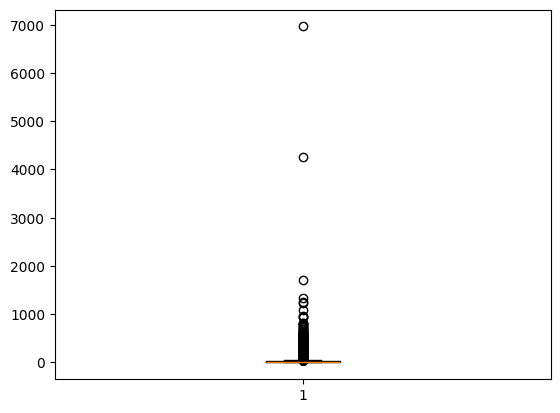

In [26]:
plt.boxplot(df_a['fare_amount'])

In [27]:
for col in ['fare_amount', 'trip_distance', 'duration']:
    q1 = df_a[col].quantile(0.25)
    q3 = df_a[col].quantile(0.75)
    IQR = q3 - q1

    lower_bound = q1 - 1.5*IQR
    upper_bound = q3 + 1.5*IQR

    df_a = df_a[(df_a[col]>=lower_bound) & ( df_a[col]<=upper_bound)]

In [28]:
df_a

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
24549227,1,Card,29.5,10.63,18.400000
24549228,1,Cash,9.5,2.13,13.016667
24549231,1,Cash,19.0,5.50,19.583333
24549234,1,Cash,33.0,11.30,26.050000


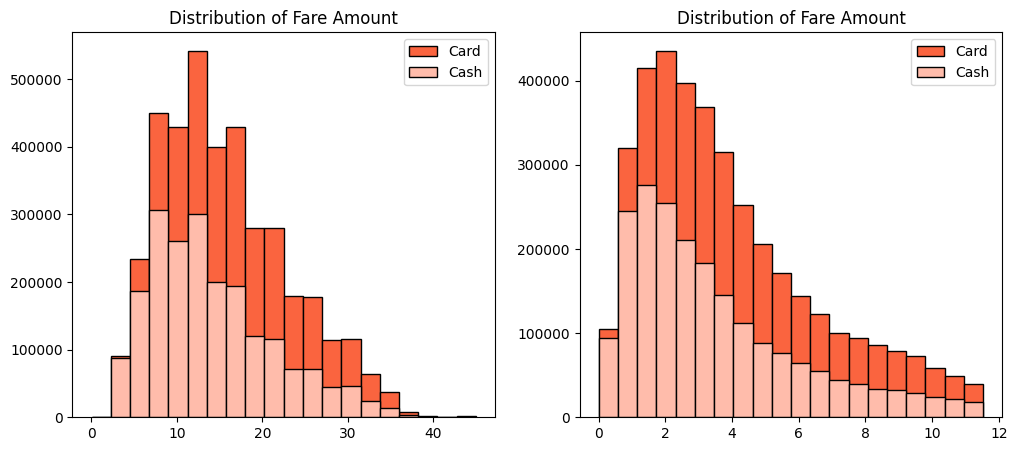

In [29]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.title('Distribution of Fare Amount')
plt.hist(df_a[df_a['payment_type'] == 'Card'] ['fare_amount'], histtype = 'barstacked', bins= 20, edgecolor = 'k', color = '#fa643f', label = 'Card')
plt.hist(df_a[df_a['payment_type'] == 'Cash'] ['fare_amount'], histtype = 'barstacked', bins= 20, edgecolor = 'k', color = '#ffbcab', label = 'Cash')
plt.legend()

plt.subplot(1,2,2)
plt.title('Distribution of Fare Amount')
plt.hist(df_a[df_a['payment_type'] == 'Card'] ['trip_distance'], histtype = 'barstacked', bins= 20, edgecolor = 'k', color = '#fa643f', label = 'Card')
plt.hist(df_a[df_a['payment_type'] == 'Cash'] ['trip_distance'], histtype = 'barstacked', bins= 20, edgecolor = 'k', color = '#ffbcab', label = 'Cash')
plt.legend()
plt.show()

In [30]:
df_a.groupby('payment_type').agg({'fare_amount': ['mean', 'std'], 'trip_distance': ['mean', 'std']})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           15.782874  7.342618      3.924750  2.630124
Cash           14.144397  7.136891      3.452551  2.559576

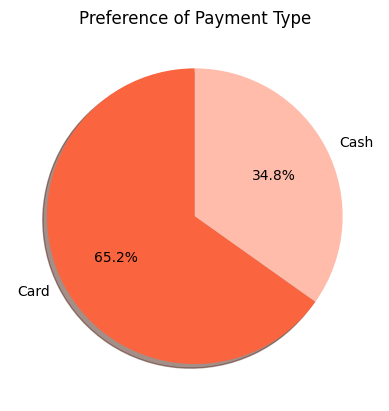

In [31]:
plt.title('Preference of Payment Type')
plt.pie(
    df_a['payment_type'].value_counts(normalize = True),
    labels = df_a['payment_type'].value_counts().index,
    startangle = 90,
    shadow = True,
    autopct = '%1.1f%%',
    colors = ['#fa643f', '#ffbcab']
)
plt.show()

In [32]:
passenger_count = df_a.groupby(['payment_type', 'passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns = {'passenger_count':'count'}, inplace = True)
passenger_count.reset_index(inplace = True)

In [33]:
passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum())*100

In [34]:
df_n = pd.DataFrame(columns = ['payment_type',1,2,3,4,5])
df_n['payment_type'] = ['Card', 'Cash']
df_n.iloc[0,1:] = passenger_count.iloc[0:5,-1]
df_n.iloc[1,1:] = passenger_count.iloc[5:,-1]

In [35]:
df_n

,payment_type,1,2,3,4,5
0,Card,37.054752,13.824759,5.701045,3.057387,5.537317
1,Cash,20.888908,7.2256,2.761393,1.532951,2.415887


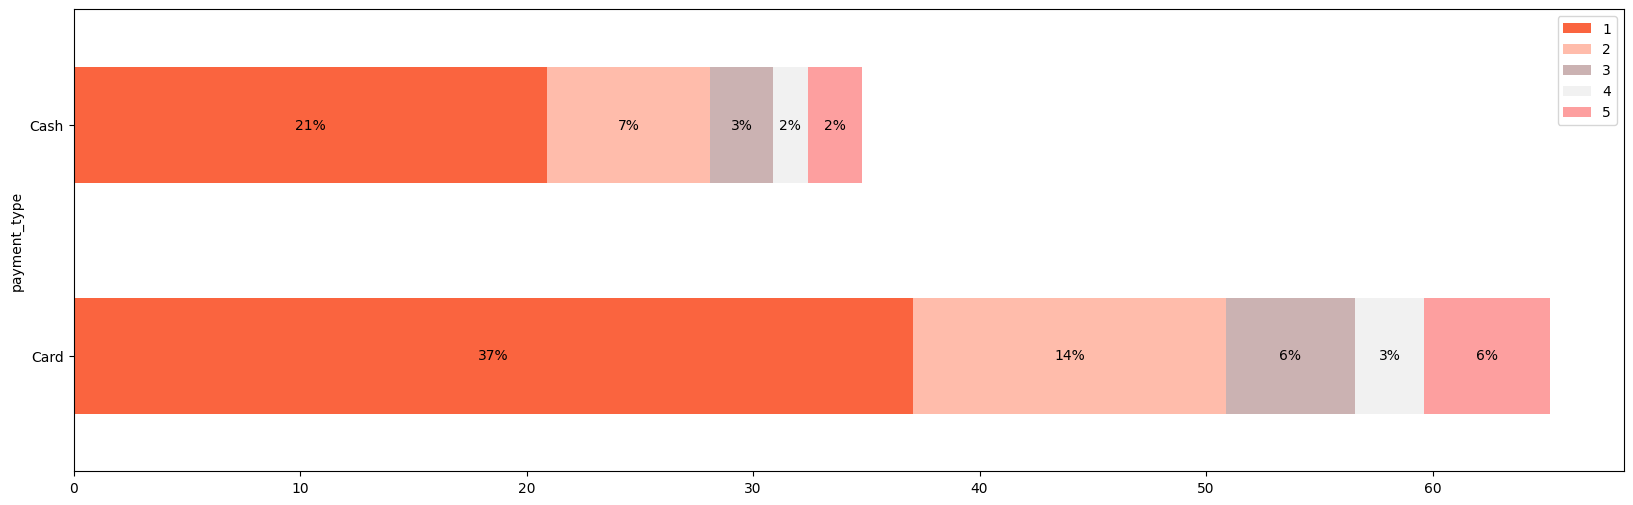

In [36]:
fig, ax = plt.subplots(figsize =(20,6))
df_n.plot(x = 'payment_type', kind = 'barh', stacked = True, ax = ax, color = ['#fa643f', '#ffbcab', '#cbb2b2', '#f1f1f1', '#fd9f9f'])

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y= p.get_xy()
    ax.text(x + width / 2,
            y + height / 2,
            '{:.0f}%'.format(width),
            horizontalalignment = 'center',
            verticalalignment = 'center')

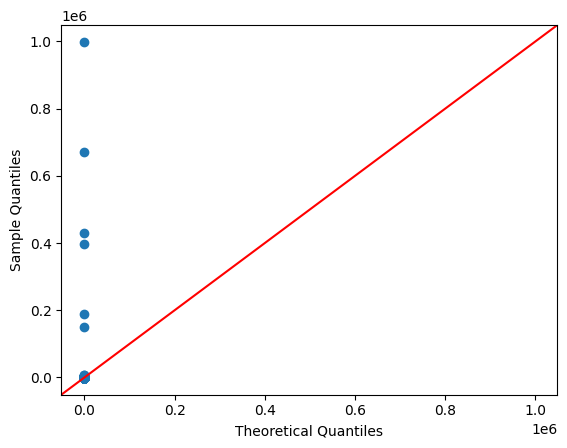

In [37]:
sm.qqplot(df['fare_amount'], line = '45')
plt.show()

In [47]:
card_sample = df_a[df_a['payment_type'] == 'Card']['fare_amount']
cash_sample = df_a[df_a['payment_type'] == 'Cash']['fare_amount']

In [49]:
t_stats, p_values = st.ttest_ind(a = card_sample, b = cash_sample, equal_var = False)
print('T statistics', t_stats, 'p-values', p_values)

T statistics 262.6385877195428 p-values 0.0


In [42]:
df["trip_date"] = df["tpep_pickup_datetime"].dt.date
trip_counts = df.groupby('trip_date').size()

In [43]:
trip_counts.index = pd.to_datetime(trip_counts.index)
trip_counts_2020 = trip_counts.loc["2020"]

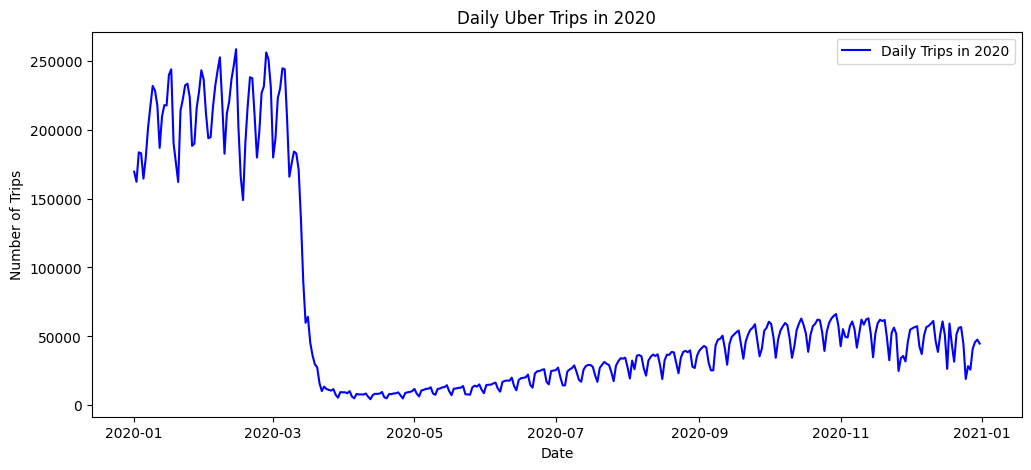

In [44]:
plt.figure(figsize=(12, 5))
plt.plot(trip_counts_2020, label="Daily Trips in 2020", color="blue")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.title("Daily Uber Trips in 2020")
plt.legend()
plt.show()

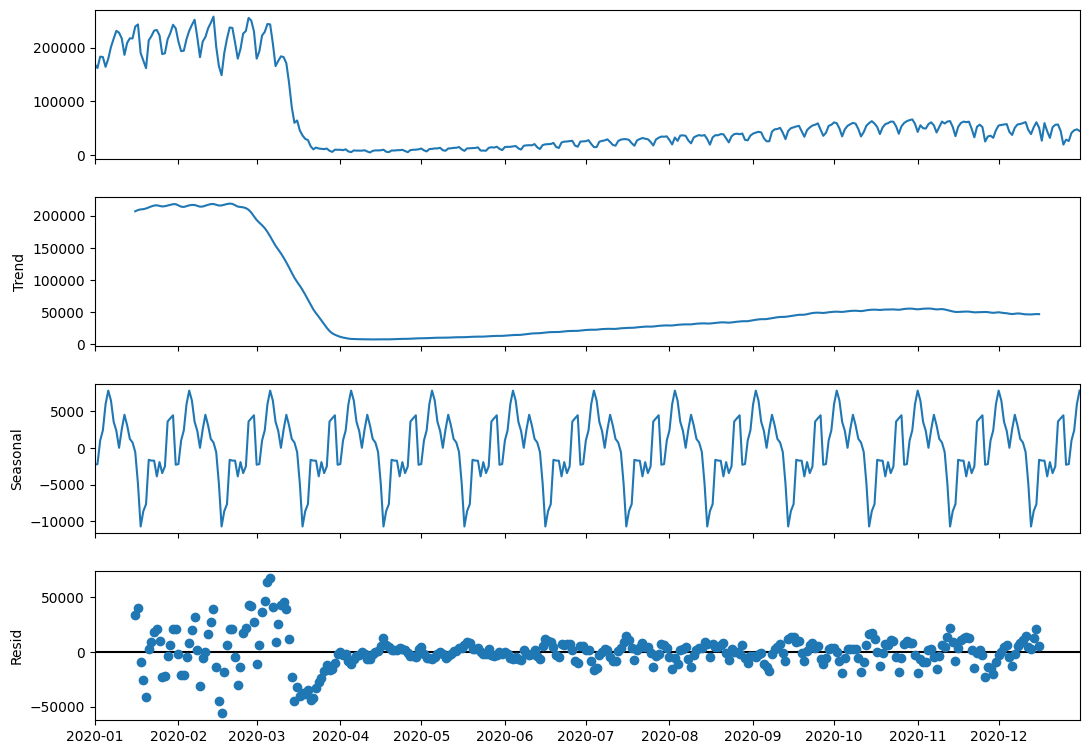

In [45]:
decomposition = seasonal_decompose(trip_counts_2020, model='additive', period=30)
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

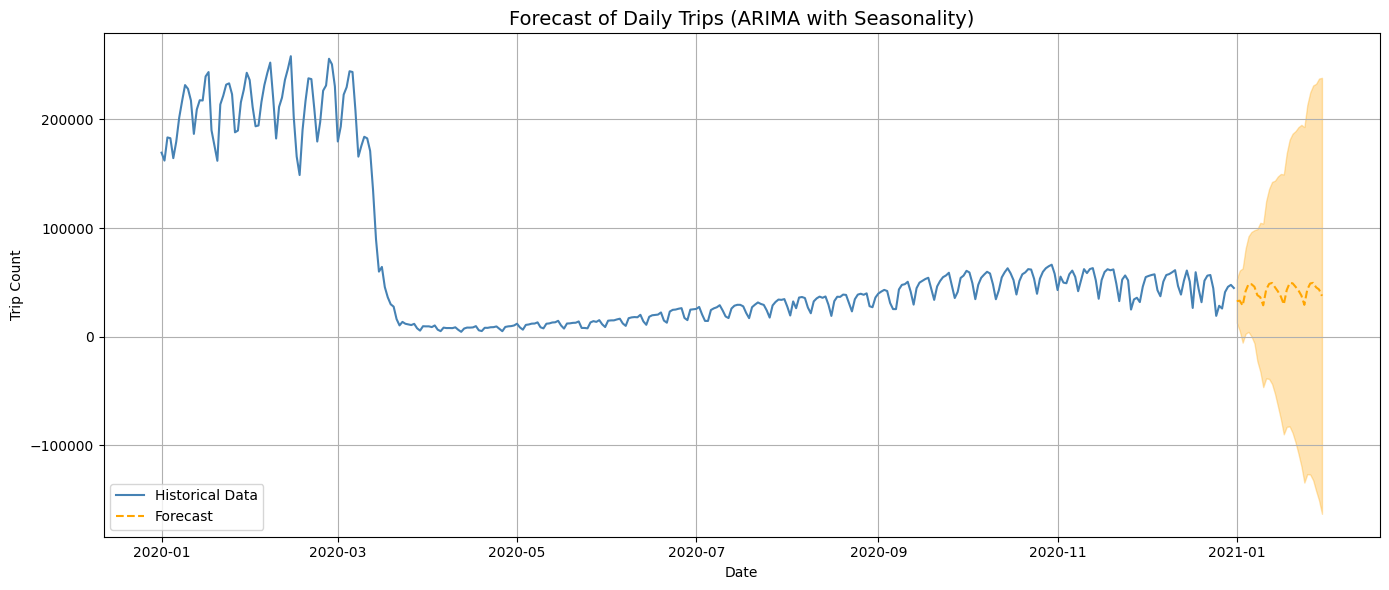

In [53]:
model = SARIMAX(trip_counts_2020, order=(1,1,1), seasonal_order=(1,1,1,7))
model_fit = model.fit(disp=False)

forecast_steps = 30
forecast_result = model_fit.get_forecast(steps=forecast_steps)
forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

forecast_index = pd.date_range(start=trip_counts_2020.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq="D")

plt.figure(figsize=(14, 6))
plt.plot(trip_counts_2020, label="Historical Data", color='steelblue')
plt.plot(forecast_index, forecast, label="Forecast", color='orange', linestyle="dashed")

plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='orange', alpha=0.3, label='95% Confidence Interval')

plt.title("Forecast of Daily Trips", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Trip Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [47]:
df_a

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
24549227,1,Card,29.5,10.63,18.400000
24549228,1,Cash,9.5,2.13,13.016667
24549231,1,Cash,19.0,5.50,19.583333
24549234,1,Cash,33.0,11.30,26.050000


In [48]:
X = df_a[["trip_distance", "duration", "passenger_count"]]
y = df_a["fare_amount"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [50]:
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

R² Score: 0.9711055894064555
Mean Absolute Error: 0.5777584816091962
